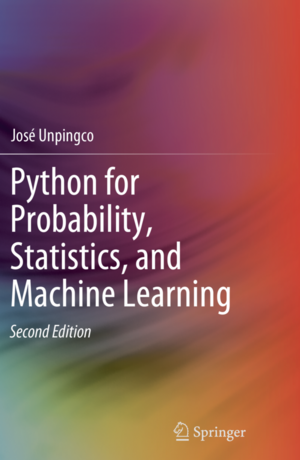

In [1]:
from IPython.display import Image
Image('../../Python_probability_statistics_machine_learning_2E.png',width=200)

In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
from matplotlib.pylab import subplots
from matplotlib.patches import  Circle, Rectangle

### Survival curves

The problem is to estimate the length of time units (e.g.,
subjects,
individuals, components) exist in a cohort over time. For example,
consider the
following data. The rows are the days in a 30-day period and the
columns are the
individual units. For example, these could be five patients who
all receive a
particular treatment on day 0 and then *survive* (indicated by
`1`) the next 30
days on not (indicated by `0`)

In [3]:
d = pd.DataFrame(index=range(1,8),
                 columns=['A','B','C','D','E' ],
                 data=1)
d.loc[3:,'A']=0
d.loc[6:,'B']=0
d.loc[5:,'C']=0
d.loc[4:,'D']=0
d.index.name='day'
d

,A,B,C,D,E
day,,,,,
1,1,1,1,1,1
2,1,1,1,1,1
3,0,1,1,1,1
4,0,1,1,0,1
5,0,1,0,0,1
6,0,0,0,0,1
7,0,0,0,0,1


Importantly, survival is a one-way street --- once a subject is *dead*, then
that subject cannot return to the experiment. This is important because survival
analysis is also applied to component-failure or other topics where this fact is
not so obvious. The following chart shows the survival status of each of the
subjects for all seven days. The blue circles indicate that the subject is alive
and the red squares indicate death of the subject.

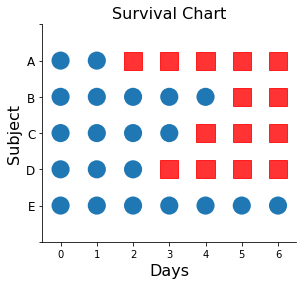

In [4]:
fig,ax =subplots()

_=ax.axis((-0.5,6.5,-1,5))
for ii,jj in zip(*np.where(d.values)):
    _=ax.add_patch(Circle((ii,jj),0.25))

for ii,jj in zip(*np.where(d.values==0)):
    _=ax.add_patch(Rectangle((ii-0.25,jj-0.25),0.5,0.5,color='red',alpha=.8))
    
_=ax.set_yticklabels(['','A','B','C','D','E','',''],fontsize=12);
_=ax.invert_yaxis()
_=ax.set_xlabel('Days',fontsize=16)
_=ax.set_ylabel('Subject',fontsize=16)
_=ax.set_title('Survival Chart',fontsize=16)

_=ax.spines['right'].set_visible(0)
_=ax.spines['top'].set_visible(0)
ax.set_aspect(1)
fig.savefig('fig-statistics/survival_analysis_001a.png')

<!-- # ** -->

<!-- dom:FIGURE: [fig-statistics/survival_analysis_001a.png,
width=800 frac=0.65] The red squares indicate a dead subject, and the blue a
living subject. <div id="fig:survival_analysis_001a"></div> -->
<!-- begin
figure -->
<div id="fig:survival_analysis_001a"></div>

<p>The red squares
indicate a dead subject, and the blue a living subject.</p>
<img src="fig-
statistics/survival_analysis_001a.png" width=400>

<!-- end figure -->

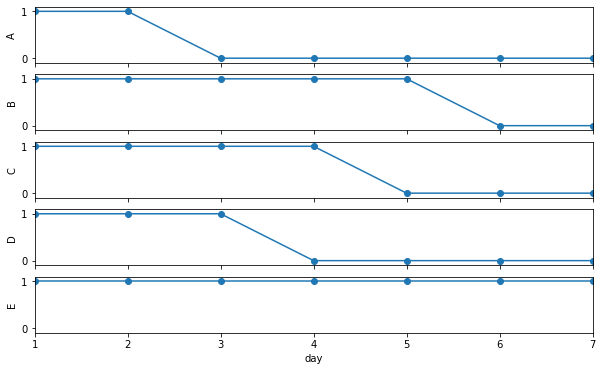

In [5]:
fig,axs=subplots(5,1,sharex=True,sharey=True)
fig.set_size_inches((10,6))

for i,j in enumerate(d.columns):
    _=d[j].plot(ax=axs[i],marker='o')
    _=axs[i].axis(ymax=1.1,ymin=-.1)
    _=axs[i].set_ylabel(j)

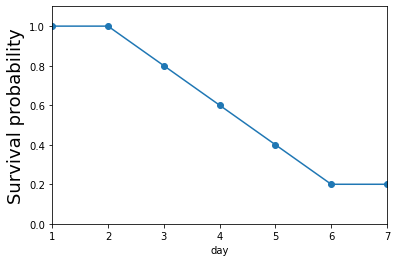

In [6]:
fig,ax=subplots()
_=(d.sum(axis=1)/d.shape[1]).plot(ax=ax,marker='o')
_=ax.set_ylabel('Survival probability',fontsize=18)
_=ax.axis(ymin=0,ymax=1.1)
fig.savefig('fig-statistics/survival_analysis_001.png')

<!-- dom:FIGURE: [fig-statistics/survival_analysis_001.png, width=800 frac=0.65]
The survival probability decreases by day. <div
id="fig:survival_analysis_001"></div> -->
<!-- begin figure -->
<div
id="fig:survival_analysis_001"></div>

<p>The survival probability decreases by
day.</p>
<img src="fig-statistics/survival_analysis_001.png" width=300>

<!--
end figure -->


There is another important recursive perspective on this
calculation. Imagine
there is a life raft containing $[A,B,C,D,E]$. Everyone
survives until day two
when \emph{A} dies. This leaves four in the life raft
$[B,C,D,E]$. Thus,  from the
perspective of day one, the survival probability is
the probability of surviving
just up until day two and then surviving day two,
$\mathbb{P}_S(t\ge 2)
=\mathbb{P}(t\notin [0,2)\vert
t<2)\mathbb{P}_S(t=2)=(1)(4/5)=4/5$. In words,
this means that surviving past
the second day is the product of surviving the
second day itself and not having
a death up to that point (i.e., surviving up to
that point). Using this
recursive approach, the survival probability for the
third day is
$\mathbb{P}_S(t\ge 3) =\mathbb{P}_S(t> 3)\mathbb{P}_S(t=3)=(4/5)(3/4)=3/5$.
Recall that just before the third day, the
life raft contains $[B,C,D,E]$ and
on the third day we have $[B,C,E]$. Thus,
from the perspective of just before
the third day there are four survivors in
the raft and on the third day there
are three $3/4$. Using this recursive
argument generates the same plot and comes
in handy with censoring.

### Censoring and truncation

Censoring occurs when a
subject leaves (right censoring) or enters (left
censoring) the study. There are
two general types of right censoring.
The so-called Type I right censoring is
when a subject randomly drops
out of the study.
This random drop-out is another
statistical effect that has to be accounted for
in estimating survival. Type II
right censoring occurs when the study is
terminated when enough specific random
events occur.

Likewise, left censoring occurs when a subject enters the study
prior to a certain
date, but exactly when this happened is unknown. This happens
in study designs
involving two separate studies stages. For example, a subject
might enroll in the
first selection process but be ineligible for the second
process. Specifically,
suppose a study concerns drug use and certain subjects
have used the drug before
the study but are unable to report exactly when. These
subjects are left
censored. Left truncation (a.k.a. staggered entry, delayed
entry) is similar
except the date of entry is known. For example, a subject that
starts taking a drug
after being initially left out of the study.

Right
censoring is the most common so let's consider an example. Let's estimate
the
survival function given the following survival times in days:

$$
\{ 1, 2,3^+,4,5,6^+,7,8 \}
$$

 where the censored survival times are indicated by the
plus symbol. As before,
the survival time at the $0^{th}$ day is $8/8=1$, the
first day is $7/8$, the
second day = $(7/8)(6/7)$. Now, we come to the first
right censored entry. The
survival time for the third day is $(7/8)(6/7)(5/5) =
(7/8)(6/7)$. Thus, the
subject who dropped out is not considered *dead* and
cannot be counted as such
but is considered just *absent* as far as the
functional estimation of the
probabilities goes. Continuing for the fourth day,
we have
$(7/8)(6/7)(5/5)(4/5)$, the fifth day, $(7/8)(6/7)(5/5)(4/5)(3/4)$, the
sixth
(right censored) day $(7/8)(6/7)(5/5)(4/5)(3/4)(2/2)$, and so on. We can
summarize this in the following table:

### Hazard functions and their
properties

Generally, the *survival function* is a continuous function of time
$S(t) =
\mathbb{P}(T>t)$ where $T$ is the event time (e.g., time of death). Note
that
the cumulative density function, $F(t)=\mathbb{P}(T\le t)=1-S(t)$ and
$f(t)=\frac{dF(t)}{dt}$ is the usual probability density function. The so-called
*hazard function* is the instantaneous rate of failure at time $t$,

$$
h(t) = \frac{f(t)}{S(t)} = \lim_{\Delta t \rightarrow 0}\frac{\mathbb{P}(T
\in (t,t+\Delta t]|T\ge t)}{\Delta t}
$$

Note that is a continuous-limit version of
the calculation we performed above.
In words, it says given the event time $T\ge
t$ (subject has survived up to
$t$), what is the probability of the event
occurring in the differential
interval $\Delta t$ for a vanishingly small
$\Delta t$. Note that this is not
the usual derivative-slope from calculus
because there is no difference term in
the numerator. The hazard function is
also called the *force of mortality*,
*intensity rate*, or the
*instantaneous risk*. Informally, you can think of the
hazard function as
encapsulating the two issues we are most concerned about:
deaths and the
population at risk for those deaths. Loosely speaking, the
probability density
function in the numerator represents the probability of a
death occurring in a
small differential interval. However, we are not
particularly interested in
unqualified deaths, but only deaths that can happen
to a specific at-risk
population. Returning to our lifeboat analogy, suppose
there are 1000 people in
the lifeboat and the probability of anybody falling off
the lifeboat is 1/1000.
Two things are happening here: (1) the probability of
the bad event is small and
(2) there are a lot of subjects over which to spread
the probability of that bad
event. This means that the hazard rate for any
particular individual is small.
On the other hand, if there are only two
subjects in the life raft and the
probability of falling off is 3/4, then the
hazard rate is high because not only
is the unfortunate event probable, the risk
of that unfortunate event is shared
by only two  subjects.

It is a mathematical
fact that,

$$
h(t) = \frac{-d \log S(t)}{dt}
$$

 This leads to the following interpretation

$$
S(t) = \exp\left( -\int_0^t h(u)du\right) := \exp(-H(t))
$$

 where $H(t)$ is the *cumulative hazard function*. Note that $H(t)=-\log S(t)$.
Consider a subject whose survival time is 5 years. For this subject to have died
at
the fifth year, it had to be alive during the fourth year. Thus, the *hazard*
at
5 years is the failure rate per-year, conditioned on the fact that the
subject
survived until the fourth year. Note that this is *not* the same as the
unconditional failure rate per year at the fifth year, because the unconditional
rate applies to all units at time zero and does not use information about
survival up to that point gleaned from the other units. Thus, the *hazard
function* can be thought of as the point-wise unconditional probability of
experiencing the event, scaled by the fraction of survivors up to that point.
## Example

To get a sense of this, let's consider the example where the
probability
density function  is exponential with parameter $\lambda$,
$f(t)=\lambda
\exp(-t\lambda),\; \forall t>0$. This makes $S(t) = 1- F(t) =
\exp(-t\lambda)$
and then the hazard function becomes $h(t)=\lambda$, namely a
constant. To see
this, recall that the exponential distribution is the only
continuous
distribution that has no memory:

$$
\mathbb{P}(X\le u+t \vert X>u) = 1-\exp(-\lambda t) = \mathbb{P}(X\le t)
$$

 This means no matter how long we have
been waiting for a death to occur, the
probability of a death from that point
onward is the same - thus the hazard
function is a constant.


### Expectations

Given all these definitions, it is
an exercise in integration by parts to show
that the expected life remaining is
the following:

$$
\mathbb{E}(T) = \int_0^\infty S(u) du
$$

 This is equivalent to the following:

$$
\mathbb{E}(T \big\vert t=0) = \int_0^\infty S(u) du
$$

 and we can likewise express the expected remaining life at $t$ as the
following,

$$
\mathbb{E}(T \big\vert T\ge t) = \frac{\int_t^\infty S(u) du}{S(t)}
$$

### Parametric regression models

Because we are interested in how study
parameters affect survival, we need a
model that can accommodate regression in
exogenous (independent) variables ($\mathbf{x}$).

$$
h(t\vert \mathbf{x})= h_o(t)\exp(\mathbf{x}^T \mathbf{\boldsymbol{\beta}})
$$

 where $\boldsymbol{\beta}$ are the regression coefficients and $h_o(t)$ is the
baseline instantaneous hazard function. Because the hazard function is always
nonnegative, the the effects of the covariates enter through the exponential
function. These kinds of models are called *proportional hazard rate models*.
If
the baseline function is a constant ($\lambda$), then this reduces to the
*exponential regression model* given by the following:

$$
h(t\vert \mathbf{x}) = \lambda  \exp(\mathbf{x}^T
\mathbf{\boldsymbol{\beta}})
$$

### Cox proportional hazards model

The tricky part about the above proportional
hazard rate model is the
specification of the baseline instantaneous hazard
function. In many cases, we
are not so interested in the absolute hazard
function (or its correctness), but
rather a comparison of such hazard functions
between two study populations. The
Cox model emphasizes this comparison by using
a maximum likelihood algorithm for
a partial likelihood function. There is a lot
to keep track of in this model, so
let's try the mechanics  first to get a feel
for what is going on.

Let $j$ denote the $j^{th}$ failure time, assuming that
failure times are sorted
in increasing order. The hazard function for subject
$i$ at failure time $j$ is
$h_i(t_j)$. Using the general proportional hazards
model, we have

$$
h_i(t_j) = h_0(t_j)\exp(z_i \beta) := h_0(t_j)\psi_i
$$

To keep it simple, we have $z_i \in \{0,1\}$ that indicates membership in the
experimental group ($z_{i}=1$) or the control group ($z_i=0$).
Consider the
first failure time, $t_1$ for subject $i$ failing is the hazard
function
$h_i(t_1)=h_0(t_1)\psi_{i}$. From the definitions, the probability that
subject
$i$ is the one who fails is the following:

$$
p_1 = \frac{h_{i}(t_1)}{\sum h_k(t_1)}= \frac{h_{0}(t_1)\psi_i}{\sum h_0(t_1)
\psi_k}
$$

 where the summation is over all surviving units up to that point. Note that the
baseline hazard cancels out and gives the following,

$$
p_1=\frac{\psi_{i}}{\sum_k \psi_k}
$$

We can keep computing this for the other failure times to obtain
$\{p_1,p_2,\ldots\,p_D\}$. The product of all of these is the *partial
likelihood*, $L(\psi) = p_1\cdot p_2\cdots p_D$. The next step is to maximize
this partial likelihood (usually logarithm of the partial likelihood) over
$\beta$. There are a lot of numerical issues to keep track of here. Fortunately,
the Python `lifelines`
module can keep this all straight for us.

Let's see how
this works using the `Rossi` dataset that is available in
lifelines.

In [7]:
from lifelines.datasets import load_rossi
from lifelines import CoxPHFitter, KaplanMeierFitter
rossi_dataset = load_rossi()

The Rossi dataset dataset concerns prison recidivism. The `fin` variable
indicates whether or not the subjects received financial assistance upon
discharge from prison.

* `week`: week of first arrest after release, or
censoring time.

* `arrest`: the event indicator, equal to 1 for those arrested
during the period of the study and 0 for those who were not arrested.

* `fin`:
a factor, with levels yes if the individual received financial aid after release
from prison, and no if he did not; financial aid was a randomly assigned factor
manipulated by the researchers.

* `age`: in years at the time of release.

*
`race`: a factor with levels black and other.

* `wexp`: a factor with levels
yes if the individual had full-time work experience prior to incarceration and
no if he did not.

* `mar`: a factor with levels married if the individual was
married at the time of release and not married if he was not.

* `paro`: a
factor coded yes if the individual was released on parole and no if he was not.
* `prio`: number of prior convictions.

* `educ`: education, a categorical
variable coded numerically, with codes 2 (grade 6 or less), 3 (grades 6 through
9), 4 (grades 10 and 11), 5 (grade 12), or 6 (some post-secondary).

* `emp1` -
`emp52`: factors coded yes if the individual was employed in the corresponding
week of the study and no otherwise.

In [8]:
rossi_dataset.head()

,week,arrest,fin,age,race,wexp,mar,paro,prio
0,20,1,0,27,1,0,0,1,3
1,17,1,0,18,1,0,0,1,8
2,25,1,0,19,0,1,0,1,13
3,52,0,1,23,1,1,1,1,1
4,52,0,0,19,0,1,0,1,3


Now, we just have to set up the calculation in `lifelines`, using the
`scikit-
learn` style. The `lifelines` module handles the censoring
issues.

In [9]:
cph = CoxPHFitter()
cph.fit(rossi_dataset, 
        duration_col='week', 
        event_col='arrest')
cph.print_summary()  # access the results using cph.summary

<lifelines.CoxPHFitter: fitted with 432 observations, 318 censored>
      duration col = 'week'
         event col = 'arrest'
number of subjects = 432
  number of events = 114
partial log-likelihood = -658.75
  time fit was run = 2019-08-27 19:17:05 UTC

---
      coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
fin  -0.38      0.68      0.19           -0.75           -0.00                0.47                1.00
age  -0.06      0.94      0.02           -0.10           -0.01                0.90                0.99
race  0.31      1.37      0.31           -0.29            0.92                0.75                2.50
wexp -0.15      0.86      0.21           -0.57            0.27                0.57                1.30
mar  -0.43      0.65      0.38           -1.18            0.31                0.31                1.37
paro -0.08      0.92      0.20           -0.47            0.30                0.63                1.35
prio  0.09      1.10

The values in the summary are plotted in
[Figure](#fig:survival_analysis_002).
<!-- dom:FIGURE: [fig-statistics/survival_analysis_002.png, width=800 frac=0.65]
This shows the fitted coefficients from the summary table for each covariate.
<div id="fig:survival_analysis_002"></div> -->
<!-- begin figure -->
<div
id="fig:survival_analysis_002"></div>

<p>This shows the fitted coefficients
from the summary table for each covariate.</p>
<img src="fig-
statistics/survival_analysis_002.png" width=300>

<!-- end figure -->

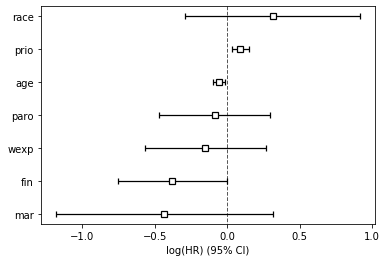

In [10]:
ax=cph.plot();
ax.figure.savefig('fig-statistics/survival_analysis_002.png')

The Cox proportional hazards model object from `lifelines` allows us to predict
the survival function for an individual with given covariates, assuming that
the
individual just entered the study.  For example, for the first individual
(i.e.,
row) in the `rossi_dataset`, we can use the model to predict the
survival
function for that individual.

In [11]:
cph.predict_survival_function(rossi_dataset.iloc[0,:]).head()

,0
T,
1.0,0.997616
2.0,0.995230
3.0,0.992848
4.0,0.990468
5.0,0.988085


This result is plotted in [Figure](#fig:survival_analysis_003).

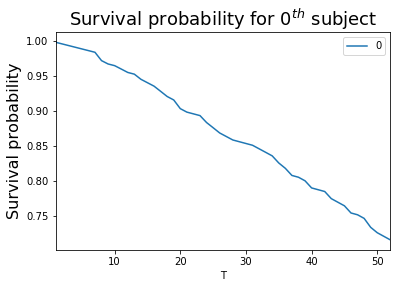

In [12]:
fig,ax =subplots()
_=cph.predict_survival_function(rossi_dataset.iloc[0,:]).plot(ax=ax)
_=ax.set_ylabel('Survival probability',fontsize=16)
_=ax.set_title('Survival probability for $0^{th}$ subject',fontsize=18)
fig.savefig('fig-statistics/survival_analysis_003.png')

<!-- # !bc pyconsole -->
<!-- # kmf1 = KaplanMeierFitter() -->
<!-- # t1 =
rossi_dataset[rossi_dataset.fin==1] -->
<!-- #
kmf1.fit(t1.week,event_observed=t1.arrest,label='fin=1') -->
<!-- # kmf0 =
KaplanMeierFitter() -->
<!-- # t0 = rossi_dataset[rossi_dataset.fin==0] -->
<!--
# kmf0.fit(t0.week,event_observed=t0.arrest,label='fin=0') -->
<!-- # !ec -->
<!-- # -->
<!-- # !bc pyconcode -->
<!-- # fig, ax = subplots() -->
<!-- #
_=kmf1.plot_loglogs(ax=ax) -->
<!-- # _=kmf0.plot_loglogs(ax=ax) -->
<!-- #
fig.savefig('fig-statistics/survival_analysis_003.png') -->
<!-- # !ec -->
<!-- dom:FIGURE: [fig-statistics/survival_analysis_003.png, width=800 frac=0.65]
The Cox proportional hazards model can predict the survival probability for an
individual based on their covariates. <div id="fig:survival_analysis_003"></div>
-->
<!-- begin figure -->
<div id="fig:survival_analysis_003"></div>

<p>The Cox
proportional hazards model can predict the survival probability for an
individual based on their covariates.</p>
<img src="fig-
statistics/survival_analysis_003.png" width=300>

<!-- end figure -->